In [1]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

In [2]:
#source - https://fantasy.premierleague.com/drf/bootstrap-static
with open('data1.json', encoding = 'utf8') as data_file:    
    data = json.load(data_file)

In [3]:
for i,j in data.items():
    pprint(i)

'elements'
'total-players'
'player'
'element_types'
'watched'
'next-event'
'phases'
'stats'
'game-settings'
'current-event'
'teams'
'stats_options'
'last-entry-event'
'entry'
'next_event_fixtures'
'events'


In [4]:
data['stats_options']

[{'name': 'Total score', 'key': 'total_points'},
 {'name': 'Round score', 'key': 'event_points'},
 {'name': 'Price', 'key': 'now_cost'},
 {'name': 'Teams selected by %', 'key': 'selected_by_percent'},
 {'name': 'Minutes played', 'key': 'minutes'},
 {'name': 'Goals scored', 'key': 'goals_scored'},
 {'name': 'Assists', 'key': 'assists'},
 {'name': 'Clean sheets', 'key': 'clean_sheets'},
 {'name': 'Goals conceded', 'key': 'goals_conceded'},
 {'name': 'Own goals', 'key': 'own_goals'},
 {'name': 'Penalties saved', 'key': 'penalties_saved'},
 {'name': 'Penalties missed', 'key': 'penalties_missed'},
 {'name': 'Yellow cards', 'key': 'yellow_cards'},
 {'name': 'Red cards', 'key': 'red_cards'},
 {'name': 'Saves', 'key': 'saves'},
 {'name': 'Bonus', 'key': 'bonus'},
 {'name': 'Bonus Points System', 'key': 'bps'},
 {'name': 'Influence', 'key': 'influence'},
 {'name': 'Creativity', 'key': 'creativity'},
 {'name': 'Threat', 'key': 'threat'},
 {'name': 'ICT Index', 'key': 'ict_index'},
 {'name': 'For

In [5]:
#data['game-settings']

In [6]:
player_data_json = data['elements']
#print(player_data_json)

In [7]:
player_data_df = pd.DataFrame(player_data_json)
pdata = player_data_df.copy()
pdata.head(10)

,id,photo,web_name,team_code,status,code,first_name,second_name,squad_number,news,now_cost,chance_of_playing_this_round,chance_of_playing_next_round,value_form,value_season,cost_change_start,cost_change_event,cost_change_start_fall,cost_change_event_fall,in_dreamteam,dreamteam_count,selected_by_percent,form,transfers_out,transfers_in,transfers_out_event,transfers_in_event,loans_in,loans_out,loaned_in,loaned_out,total_points,event_points,points_per_game,ep_this,ep_next,special,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,ea_index,element_type,team
0,1,48844.jpg,Ospina,3,a,48844,David,Ospina,13.0,,50,None,NaN,0.0,0.0,0,0,0,0,False,0,0.2,0.0,0,0,0,0,0,0,0,0,2,0,1.0,None,3.4,False,143,0,0,0,4,0,0,0,0,0,4,0,18,28.8,0.0,0.0,2.9,0,1,1
1,2,11334.jpg,Cech,3,a,11334,Petr,Cech,33.0,,55,None,NaN,0.0,0.0,0,0,0,0,False,0,5.6,0.0,0,0,0,0,0,0,0,0,134,0,3.8,None,4.2,False,3097,0,0,12,37,1,0,0,2,0,115,2,660,819.8,0.1,0.0,82.0,0,1,1
2,3,98980.jpg,Martinez,3,u,98980,Damian Emiliano,Martinez,26.0,Season-long loan to Getafe,40,None,0.0,0.0,0.0,0,0,0,0,False,0,1.3,0.0,0,0,0,0,0,0,0,0,8,0,4.0,None,0.0,False,180,0,0,1,3,0,0,0,0,0,5,0,35,30.6,0.0,0.0,3.1,0,1,1
3,4,51507.jpg,Koscielny,3,s,51507,Laurent,Koscielny,6.0,Suspended until 27 Aug,60,None,0.0,0.0,0.0,0,0,0,0,False,0,0.6,0.0,0,0,0,0,0,0,0,0,121,0,3.7,None,0.0,False,2821,2,1,10,37,0,0,0,4,1,0,19,723,831.2,53.9,239.0,112.7,0,2,1
4,5,17127.jpg,Mertesacker,3,d,17127,Per,Mertesacker,4.0,Facial Injury - 75% chance of playing,50,None,75.0,0.0,0.0,0,0,0,0,False,0,0.6,0.0,0,0,0,0,0,0,0,0,1,0,1.0,None,2.1,False,38,0,0,0,1,0,0,0,0,0,0,0,5,17.8,0.1,0.0,1.8,0,2,1
5,6,158074.jpg,Gabriel,3,d,158074,Gabriel Armando,de Abreu,5.0,Knee injury - 25% chance of playing,50,None,25.0,0.0,0.0,0,0,0,0,False,0,0.0,0.0,0,0,0,0,0,0,0,0,45,0,2.4,None,0.7,False,1517,0,0,5,18,0,0,0,6,0,0,2,296,295.8,84.5,119.0,50.0,0,2,1
6,7,98745.jpg,BellerÃ­n,3,a,98745,HÃ©ctor,BellerÃ­n,24.0,,60,None,NaN,0.0,0.0,0,0,0,0,False,0,14.5,0.0,0,0,0,0,0,0,0,0,119,0,3.6,None,3.5,False,2503,1,5,10,34,0,0,0,4,0,0,12,569,437.6,508.3,395.0,133.8,0,2,1
7,8,42427.jpg,Gibbs,3,d,42427,Kieran,Gibbs,3.0,Illness - 75% chance of playing,50,None,75.0,0.0,0.0,0,0,0,0,False,0,0.2,0.0,0,0,0,0,0,0,0,0,45,0,4.1,None,2.1,False,702,0,1,6,3,0,0,0,3,0,0,3,201,142.4,171.4,117.0,43.1,0,2,1
8,9,80254.jpg,Jenkinson,3,a,80254,Carl,Jenkinson,25.0,,45,None,NaN,0.0,0.0,0,0,0,0,False,0,0.4,0.0,0,0,0,0,0,0,0,0,2,0,2.0,None,2.3,False,82,0,0,0,1,0,0,0,0,0,0,0,12,19.4,2.0,0.0,2.1,0,2,1
9,10,38411.jpg,Monreal,3,a,38411,Nacho,Monreal,18.0,,55,None,NaN,0.0,0.0,0,0,0,0,False,0,5.7,0.0,0,0,0,0,0,0,0,0,115,0,3.2,None,3.2,False,3153,0,3,11,43,0,0,0,5,0,0,9,681,554.0,280.3,220.0,105.8,0,2,1


In [8]:
drop_cols = ['chance_of_playing_this_round','chance_of_playing_next_round','code',
            'cost_change_event','cost_change_event_fall','cost_change_start',
            'cost_change_start_fall','dreamteam_count','ea_index','ep_this',
            'event_points','form','ict_index','in_dreamteam','loaned_in',
            'loaned_out','loans_in','loans_out','news','photo','special',
            'squad_number','status', 'transfers_out','transfers_in',
             'transfers_out_event','transfers_in_event','value_form','value_season']

In [9]:
pdata.drop(drop_cols, axis = 1, inplace = True)
pdata.columns

Index(['id', 'web_name', 'team_code', 'first_name', 'second_name', 'now_cost',
       'selected_by_percent', 'total_points', 'points_per_game', 'ep_next',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'element_type', 'team'],
      dtype='object')

In [10]:
pdata['full_name'] = pdata.first_name + " " + pdata.second_name
pdata['element_type_name'] = pdata.element_type.map({x['id']:x['singular_name_short'] for x in data['element_types']})

In [11]:
pdata.head()

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,element_type_name
0,1,Ospina,3,David,Ospina,50,0.2,2,1.0,3.4,143,0,0,0,4,0,0,0,0,0,4,0,18,28.8,0.0,0.0,1,1,David Ospina,GKP
1,2,Cech,3,Petr,Cech,55,5.6,134,3.8,4.2,3097,0,0,12,37,1,0,0,2,0,115,2,660,819.8,0.1,0.0,1,1,Petr Cech,GKP
2,3,Martinez,3,Damian Emiliano,Martinez,40,1.3,8,4.0,0.0,180,0,0,1,3,0,0,0,0,0,5,0,35,30.6,0.0,0.0,1,1,Damian Emiliano Martinez,GKP
3,4,Koscielny,3,Laurent,Koscielny,60,0.6,121,3.7,0.0,2821,2,1,10,37,0,0,0,4,1,0,19,723,831.2,53.9,239.0,2,1,Laurent Koscielny,DEF
4,5,Mertesacker,3,Per,Mertesacker,50,0.6,1,1.0,2.1,38,0,0,0,1,0,0,0,0,0,0,0,5,17.8,0.1,0.0,2,1,Per Mertesacker,DEF


In [12]:
pdata.info()
pdata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   501 non-null    int64 
 1   web_name             501 non-null    object
 2   team_code            501 non-null    int64 
 3   first_name           501 non-null    object
 4   second_name          501 non-null    object
 5   now_cost             501 non-null    int64 
 6   selected_by_percent  501 non-null    object
 7   total_points         501 non-null    int64 
 8   points_per_game      501 non-null    object
 9   ep_next              501 non-null    object
 10  minutes              501 non-null    int64 
 11  goals_scored         501 non-null    int64 
 12  assists              501 non-null    int64 
 13  clean_sheets         501 non-null    int64 
 14  goals_conceded       501 non-null    int64 
 15  own_goals            501 non-null    int64 
 16  penaltie

(501, 30)

In [13]:
'''pdata = pdata.loc(axis=0)[:,['full_name','first_name','second_name', 'element_type',
                     'element_type_name','id','team', 'team_code', 'web_name',
                     'saves','penalties_saved','clean_sheets','goals_conceded',
                     'bonus', 'bps','creativity','ep_next','influence', 'threat',
                     'goals_scored','assists','minutes', 'own_goals',
                     'yellow_cards', 'red_cards','penalties_missed',
                     'selected_by_percent', 'now_cost','points_per_game','total_points']]'''

"pdata = pdata.loc(axis=0)[:,['full_name','first_name','second_name', 'element_type',\n                     'element_type_name','id','team', 'team_code', 'web_name',\n                     'saves','penalties_saved','clean_sheets','goals_conceded',\n                     'bonus', 'bps','creativity','ep_next','influence', 'threat',\n                     'goals_scored','assists','minutes', 'own_goals',\n                     'yellow_cards', 'red_cards','penalties_missed',\n                     'selected_by_percent', 'now_cost','points_per_game','total_points']]"

In [14]:
pdata['team'] = pdata.team.map({x['id']:x['name'] for x in data['teams']})

In [15]:
pdata.head()

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,element_type_name
0,1,Ospina,3,David,Ospina,50,0.2,2,1.0,3.4,143,0,0,0,4,0,0,0,0,0,4,0,18,28.8,0.0,0.0,1,Arsenal,David Ospina,GKP
1,2,Cech,3,Petr,Cech,55,5.6,134,3.8,4.2,3097,0,0,12,37,1,0,0,2,0,115,2,660,819.8,0.1,0.0,1,Arsenal,Petr Cech,GKP
2,3,Martinez,3,Damian Emiliano,Martinez,40,1.3,8,4.0,0.0,180,0,0,1,3,0,0,0,0,0,5,0,35,30.6,0.0,0.0,1,Arsenal,Damian Emiliano Martinez,GKP
3,4,Koscielny,3,Laurent,Koscielny,60,0.6,121,3.7,0.0,2821,2,1,10,37,0,0,0,4,1,0,19,723,831.2,53.9,239.0,2,Arsenal,Laurent Koscielny,DEF
4,5,Mertesacker,3,Per,Mertesacker,50,0.6,1,1.0,2.1,38,0,0,0,1,0,0,0,0,0,0,0,5,17.8,0.1,0.0,2,Arsenal,Per Mertesacker,DEF


In [16]:
pdata.corr()['total_points']

id                 -0.087756
team_code          -0.058783
now_cost            0.592595
total_points        1.000000
minutes             0.900990
goals_scored        0.711255
assists             0.703371
clean_sheets        0.889073
goals_conceded      0.753940
own_goals           0.103359
penalties_saved     0.113341
penalties_missed    0.292188
yellow_cards        0.545764
red_cards           0.129938
saves               0.213275
bonus               0.875165
bps                 0.940472
element_type        0.040511
Name: total_points, dtype: float64

In [17]:
pdata.pivot_table(index = 'element_type_name', values = 'total_points', aggfunc = np.mean)

,total_points
element_type_name,
DEF,51.744048
FWD,58.542857
GKP,51.229167
MID,54.181395


In [18]:
pdata.pivot_table(index='element_type_name', values='total_points', aggfunc=np.median)

,total_points
element_type_name,
DEF,46.5
FWD,49.5
GKP,21.5
MID,43.0


In [19]:
pdata.element_type_name.value_counts()

MID    215
DEF    168
FWD     70
GKP     48
Name: element_type_name, dtype: int64

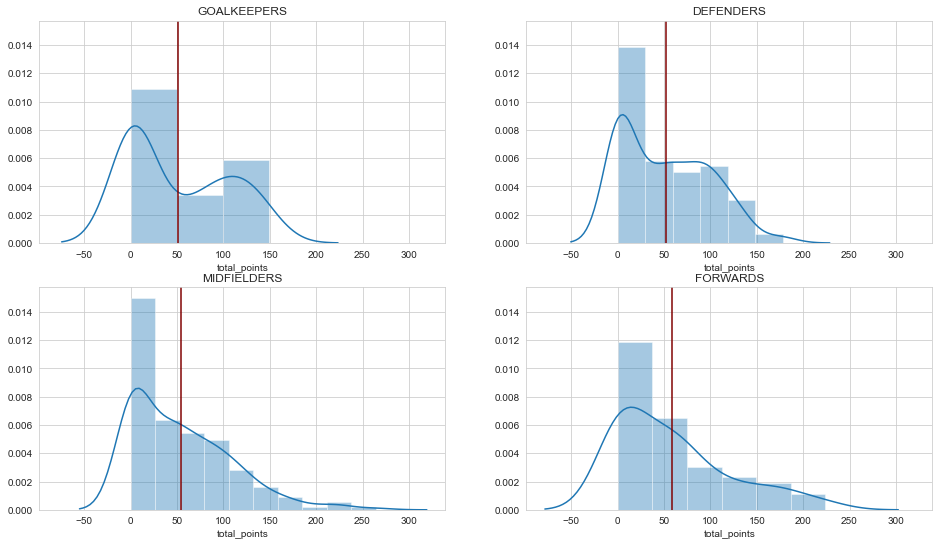

In [20]:
f = plt.figure(figsize = (16,9))

ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2, sharex = ax1, sharey = ax1)
ax3 = f.add_subplot(2,2,3, sharex = ax1, sharey = ax1)
ax4 = f.add_subplot(2,2,4, sharex = ax1, sharey = ax1)

ax1.set_title('GOALKEEPERS')
sns.distplot(pdata[pdata.element_type_name == 'GKP'].total_points, label = 'GKP', ax=ax1)
ax1.axvline(np.mean(pdata[pdata.element_type_name == 'GKP'].total_points), color = 'maroon', label = 'mean')

ax2.set_title('DEFENDERS')
sns.distplot(pdata[pdata.element_type_name == 'DEF'].total_points, label = 'DEF', ax = ax2)
ax2.axvline(np.mean(pdata[pdata.element_type_name == 'DEF'].total_points), color = 'maroon', label = 'mean')

ax3.set_title('MIDFIELDERS')
sns.distplot(pdata[pdata.element_type_name == 'MID'].total_points, label = 'MID', ax = ax3)
ax3.axvline(np.mean(pdata[pdata.element_type_name == 'MID'].total_points), color = 'maroon', label = 'mean')

ax4.set_title('FORWARDS')
sns.distplot(pdata[pdata.element_type_name == 'FWD'].total_points, label = 'FWD', ax = ax4)
ax4.axvline(np.mean(pdata[pdata.element_type_name == 'FWD'].total_points), color = 'maroon', label = 'mean')

plt.show()

DISTRIBUTION OF PLAYERS BASED ON THEIR POSITIONS AND MEAN


In [21]:
len(pdata[(pdata.total_points==0)]) / pdata.shape[0]

0.2554890219560878

In [22]:
pdata[(pdata.total_points == 0)&(pdata.minutes == 0)]

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,element_type_name
12,13,Kolasinac,3,Sead,Kolasinac,60,11.9,0,0.0,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,Arsenal,Sead Kolasinac,DEF
27,28,Lacazette,3,Alexandre,Lacazette,105,17.6,0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4,Arsenal,Alexandre Lacazette,FWD
52,53,MÃ¤enpÃ¤Ã¤,36,Niki,MÃ¤enpÃ¤Ã¤,40,1.5,0,0.0,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,Brighton,Niki MÃ¤enpÃ¤Ã¤,GKP
53,54,Ryan,36,Mathew,Ryan,45,0.8,0,0.0,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,Brighton,Mathew Ryan,GKP
54,55,Dunk,36,Lewis,Dunk,45,2.1,0,0.0,0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,Brighton,Lewis Dunk,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Hayden,4,Isaac,Hayden,45,0.2,0,0.0,-0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,Newcastle,Isaac Hayden,MID
496,497,Choupo-Moting,110,Eric Maxim,Choupo-Moting,55,0.2,0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,Stoke,Eric Maxim Choupo-Moting,MID
497,498,Walker-Peters,6,Kyle,Walker-Peters,45,0.3,0,0.0,3.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,Spurs,Kyle Walker-Peters,DEF
499,500,Lemina,20,Mario,Lemina,50,0.1,0,0.0,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3,Southampton,Mario Lemina,MID


In [23]:
impute_cols = ['saves','penalties_saved', 'clean_sheets', 'goals_conceded', 'bonus', 'bps',
               'creativity', 'influence', 'threat', 'goals_scored','assists', 'minutes', 'own_goals',
               'yellow_cards', 'red_cards','penalties_missed','points_per_game', 'total_points']
positions = set(pdata.element_type_name)
costs = set(pdata.now_cost)
medians = {}
stds = {}

In [24]:
for i in positions:
    medians['{}'.format(i)] = {}
    for c in costs:
        medians['{}'.format(i)]['{}'.format(c)] = {}
        for j in impute_cols:
            if pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==str(i))&(pdata.now_cost==c)].shape[0] > 0:
                median = np.median(pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==i)&(pdata.now_cost==c)][j].astype(np.float32))
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = median
            else:
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0

In [25]:
for i in positions:
    stds['{}'.format(i)] = {}
    for c in costs:
        stds['{}'.format(i)]['{}'.format(c)] = {}
        for j in impute_cols:
            if pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==str(i))&(pdata.now_cost==c)].shape[0] > 0:
                std = np.std(pdata[(pdata.total_points!=0)&(pdata.minutes!=0)&(pdata.element_type_name==i)&(pdata.now_cost==c)][j].astype(np.float32))
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = std
            else:
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0

In [26]:
for idx, row in pdata[(pdata.total_points==0)&(pdata.minutes==0)].iterrows():
    for col in impute_cols:
        pdata.loc[idx,col] = medians[str(row['element_type_name'])][str(row['now_cost'])][str(col)] + np.abs((np.random.randn()/1.5)*stds[str(row['element_type_name'])][str(row['now_cost'])][str(col)])

In [27]:
pdata[pdata.full_name == 'Lewis Dunk']

,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,element_type_name
54,55,Dunk,36,Lewis,Dunk,45,2.1,56.657277,3.05658,0.8,2363.194643,0.85305,0.316612,3.895243,32.469867,0.273522,0.0,0.0,3.970302,0.055763,0.0,2.068409,329.995461,297.346,94.7078,78.71,2,Brighton,Lewis Dunk,DEF


In [28]:
len(pdata[(pdata.total_points==0)]) / pdata.shape[0]

0.0

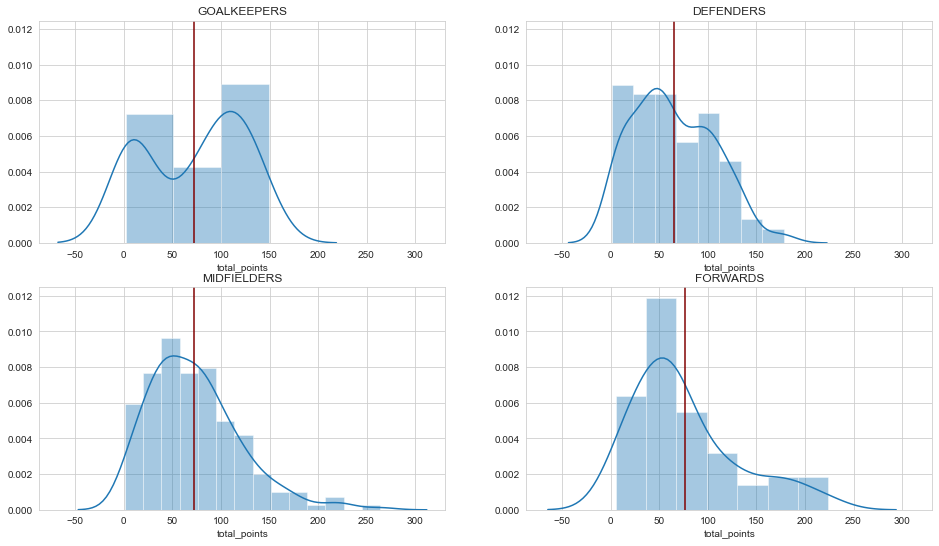

In [29]:
f = plt.figure(figsize = (16,9))

ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2, sharex = ax1, sharey = ax1)
ax3 = f.add_subplot(2,2,3, sharex = ax1, sharey = ax1)
ax4 = f.add_subplot(2,2,4, sharex = ax1, sharey = ax1)

ax1.set_title('GOALKEEPERS')
sns.distplot(pdata[pdata.element_type_name == 'GKP'].total_points, label = 'GKP', ax=ax1)
ax1.axvline(np.mean(pdata[pdata.element_type_name == 'GKP'].total_points), color = 'maroon', label = 'mean')

ax2.set_title('DEFENDERS')
sns.distplot(pdata[pdata.element_type_name == 'DEF'].total_points, label = 'DEF', ax = ax2)
ax2.axvline(np.mean(pdata[pdata.element_type_name == 'DEF'].total_points), color = 'maroon', label = 'mean')

ax3.set_title('MIDFIELDERS')
sns.distplot(pdata[pdata.element_type_name == 'MID'].total_points, label = 'MID', ax = ax3)
ax3.axvline(np.mean(pdata[pdata.element_type_name == 'MID'].total_points), color = 'maroon', label = 'mean')

ax4.set_title('FORWARDS')
sns.distplot(pdata[pdata.element_type_name == 'FWD'].total_points, label = 'FWD', ax = ax4)
ax4.axvline(np.mean(pdata[pdata.element_type_name == 'FWD'].total_points), color = 'maroon', label = 'mean')

plt.show()

In [30]:
pdata.pivot_table(index='element_type_name', values='total_points', aggfunc=np.mean)


,total_points
element_type_name,
DEF,64.697371
FWD,75.978102
GKP,72.672471
MID,72.707303


In [31]:
pdata.pivot_table(index='element_type_name', values='total_points', aggfunc=np.median)


,total_points
element_type_name,
DEF,57.500000
FWD,60.174892
GKP,87.500000
MID,68.000000


In [32]:
#Linear Programming Library
from pulp import *
import pulp

In [33]:
prob = pulp.LpProblem('FantasyTeam', pulp.LpMaximize)


In [34]:
decision_variables = []
for rownum, row in pdata.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat = 'Integer')
    decision_variables.append(variable)
    
print("total no of decision variables:" + str(len(decision_variables)))
print(decision_variables)

total no of decision variables:501
[x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71, x72, x73, x74, x75, x76, x77, x78, x79, x80, x81, x82, x83, x84, x85, x86, x87, x88, x89, x90, x91, x92, x93, x94, x95, x96, x97, x98, x99, x100, x101, x102, x103, x104, x105, x106, x107, x108, x109, x110, x111, x112, x113, x114, x115, x116, x117, x118, x119, x120, x121, x122, x123, x124, x125, x126, x127, x128, x129, x130, x131, x132, x133, x134, x135, x136, x137, x138, x139, x140, x141, x142, x143, x144, x145, x146, x147, x148, x149, x150, x151, x152, x153, x154, x155, x156, x157, x158, x159, x160, x161, x162, x163, x164, x165, x166, x167, x168, x169, x170, x171, x172, x173, x174, x175, x176, x177, x178, 

In [44]:
total_points = ""
for rownum,row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['total_points']*player
            total_points += formula
            
prob += total_points
print("Optimization function:", str(total_points))

Optimization function: 2.0*x0 + 134.0*x1 + 32.0*x10 + 132.0*x100 + 105.0*x101 + 132.14209909907476*x102 + 224.0*x103 + 121.0*x104 + 114.0*x105 + 105.0*x106 + 6.0*x107 + 162.0*x108 + 3.0*x109 + 90.0*x11 + 83.0*x110 + 12.0*x111 + 48.0*x112 + 196.0*x113 + 92.0*x114 + 8.267619564449415*x115 + 75.0*x116 + 61.0*x117 + 86.0*x118 + 46.0*x119 + 135.56309090439072*x12 + 51.0*x120 + 6.0*x121 + 47.0*x122 + 98.0*x123 + 92.0*x124 + 149.0*x125 + 93.0*x126 + 24.0*x127 + 91.0*x128 + 7.0*x129 + 264.0*x13 + 116.0*x130 + 42.0*x131 + 18.0*x132 + 136.0*x133 + 102.0*x134 + 89.0*x135 + 68.0*x136 + 135.0*x137 + 133.0*x138 + 104.0*x139 + 122.0*x14 + 9.0*x140 + 69.0*x141 + 127.0*x142 + 54.0*x143 + x144 + 113.0*x145 + 45.0*x146 + 119.0*x147 + 144.0*x148 + 23.0*x149 + 167.0*x15 + 68.0*x150 + 30.255810735806353*x151 + 22.0*x152 + 37.0*x153 + 80.0*x154 + 63.0*x155 + 16.0*x156 + 138.41269204386515*x157 + 17.0*x158 + 111.85342223205396*x159 + 38.0*x16 + 76.0*x160 + 7.927830466789679*x161 + 115.49410038362112*x162 + 37

In [45]:
cash = 830
total_paid = ""
for rownum,row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['now_cost']*player
            total_paid += formula
            
prob += (total_paid <=  cash)

In [46]:
avail_gk = 1
total_gk = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'GKP':
                formula = 1*player
                total_gk += formula

prob += (total_gk == avail_gk)
print(total_gk)


x0 + x1 + x114 + x115 + x134 + x135 + x136 + x161 + x162 + x188 + x189 + x2 + x212 + x213 + x239 + x240 + x259 + x260 + x261 + x28 + x285 + x286 + x29 + x30 + x304 + x305 + x327 + x328 + x349 + x350 + x374 + x375 + x395 + x396 + x419 + x420 + x437 + x438 + x468 + x472 + x478 + x52 + x53 + x73 + x74 + x93 + x94 + x95


In [47]:
avail_def = 4
total_def = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'DEF':
                formula = 1*player
                total_def += formula

prob += (total_def == avail_def)
print(len(total_def))


168


In [48]:
avail_mid = 4
total_mid = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'MID':
                formula = 1*player
                total_mid += formula

prob += (total_mid == avail_mid)
print(len(total_mid))


215


In [49]:
avail_fwd = 2
total_fwd = ""
for rownum, row in pdata.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['element_type_name'] == 'FWD':
                formula = 1*player
                total_fwd += formula

prob += (total_fwd == avail_fwd)
print(len(total_fwd))


70


In [50]:
team_dict= {}
for team in set(pdata.team_code):
    team_dict[str(team)]=dict()
    team_dict[str(team)]['avail'] = 3
    team_dict[str(team)]['total'] = ""
    for rownum, row in pdata.iterrows():
        for i, player in enumerate(decision_variables):
            if rownum == i:
                if row['team_code'] == team:
                    formula = 1*player
                    team_dict[str(team)]['total'] += formula

    prob += (team_dict[str(team)]['total'] <= team_dict[str(team)]['avail'])
print(len(team_dict))


20


In [51]:
print(team_dict)


{'1': {'avail': 3, 'total': 1*x106 + 1*x259 + 1*x260 + 1*x261 + 1*x262 + 1*x263 + 1*x264 + 1*x265 + 1*x266 + 1*x267 + 1*x269 + 1*x270 + 1*x271 + 1*x272 + 1*x273 + 1*x274 + 1*x275 + 1*x276 + 1*x277 + 1*x278 + 1*x279 + 1*x280 + 1*x281 + 1*x282 + 1*x283 + 1*x284 + 1*x475 + 0}, '3': {'avail': 3, 'total': 1*x0 + 1*x1 + 1*x10 + 1*x11 + 1*x12 + 1*x13 + 1*x14 + 1*x15 + 1*x16 + 1*x17 + 1*x18 + 1*x19 + 1*x2 + 1*x20 + 1*x21 + 1*x22 + 1*x23 + 1*x24 + 1*x25 + 1*x26 + 1*x27 + 1*x3 + 1*x4 + 1*x479 + 1*x488 + 1*x5 + 1*x6 + 1*x7 + 1*x8 + 1*x9 + 0}, '4': {'avail': 3, 'total': 1*x285 + 1*x286 + 1*x287 + 1*x288 + 1*x289 + 1*x290 + 1*x291 + 1*x292 + 1*x293 + 1*x294 + 1*x295 + 1*x296 + 1*x297 + 1*x298 + 1*x299 + 1*x300 + 1*x301 + 1*x302 + 1*x303 + 1*x464 + 1*x465 + 1*x466 + 1*x476 + 1*x477 + 1*x493 + 1*x494 + 1*x495 + 0}, '6': {'avail': 3, 'total': 1*x374 + 1*x375 + 1*x376 + 1*x377 + 1*x379 + 1*x380 + 1*x381 + 1*x382 + 1*x383 + 1*x384 + 1*x385 + 1*x386 + 1*x387 + 1*x388 + 1*x389 + 1*x390 + 1*x391 + 1*x392 +

In [52]:
#print(prob)


FantasyTeam:
MAXIMIZE
2.0*x0 + 134.0*x1 + 32.0*x10 + 132.0*x100 + 105.0*x101 + 132.14209909907476*x102 + 224.0*x103 + 121.0*x104 + 114.0*x105 + 105.0*x106 + 6.0*x107 + 162.0*x108 + 3.0*x109 + 90.0*x11 + 83.0*x110 + 12.0*x111 + 48.0*x112 + 196.0*x113 + 92.0*x114 + 8.267619564449415*x115 + 75.0*x116 + 61.0*x117 + 86.0*x118 + 46.0*x119 + 135.56309090439072*x12 + 51.0*x120 + 6.0*x121 + 47.0*x122 + 98.0*x123 + 92.0*x124 + 149.0*x125 + 93.0*x126 + 24.0*x127 + 91.0*x128 + 7.0*x129 + 264.0*x13 + 116.0*x130 + 42.0*x131 + 18.0*x132 + 136.0*x133 + 102.0*x134 + 89.0*x135 + 68.0*x136 + 135.0*x137 + 133.0*x138 + 104.0*x139 + 122.0*x14 + 9.0*x140 + 69.0*x141 + 127.0*x142 + 54.0*x143 + 1.0*x144 + 113.0*x145 + 45.0*x146 + 119.0*x147 + 144.0*x148 + 23.0*x149 + 167.0*x15 + 68.0*x150 + 30.255810735806353*x151 + 22.0*x152 + 37.0*x153 + 80.0*x154 + 63.0*x155 + 16.0*x156 + 138.41269204386515*x157 + 17.0*x158 + 111.85342223205396*x159 + 38.0*x16 + 76.0*x160 + 7.927830466789679*x161 + 115.49410038362112*x162 +

In [53]:
#prob.writeLP('FantasyTeam.lp')


[x0,
 x1,
 x10,
 x100,
 x101,
 x102,
 x103,
 x104,
 x105,
 x106,
 x107,
 x108,
 x109,
 x11,
 x110,
 x111,
 x112,
 x113,
 x114,
 x115,
 x116,
 x117,
 x118,
 x119,
 x12,
 x120,
 x121,
 x122,
 x123,
 x124,
 x125,
 x126,
 x127,
 x128,
 x129,
 x13,
 x130,
 x131,
 x132,
 x133,
 x134,
 x135,
 x136,
 x137,
 x138,
 x139,
 x14,
 x140,
 x141,
 x142,
 x143,
 x144,
 x145,
 x146,
 x147,
 x148,
 x149,
 x15,
 x150,
 x151,
 x152,
 x153,
 x154,
 x155,
 x156,
 x157,
 x158,
 x159,
 x16,
 x160,
 x161,
 x162,
 x163,
 x164,
 x165,
 x166,
 x167,
 x168,
 x169,
 x17,
 x170,
 x171,
 x172,
 x173,
 x174,
 x175,
 x176,
 x177,
 x178,
 x179,
 x18,
 x180,
 x181,
 x182,
 x183,
 x184,
 x185,
 x186,
 x187,
 x188,
 x189,
 x19,
 x190,
 x191,
 x192,
 x193,
 x194,
 x195,
 x196,
 x197,
 x198,
 x199,
 x2,
 x20,
 x200,
 x201,
 x202,
 x203,
 x204,
 x205,
 x206,
 x207,
 x208,
 x209,
 x21,
 x210,
 x211,
 x212,
 x213,
 x214,
 x215,
 x216,
 x217,
 x218,
 x219,
 x22,
 x220,
 x221,
 x222,
 x223,
 x224,
 x225,
 x226,
 x227,
 x228,
 x22

In [54]:
optimization_result = prob.solve()


In [55]:
assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
'''for v in prob.variables():
	print(v.name, "=", v.varValue)
'''

Status: Optimal
Optimal Solution to the problem:  2006.0
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x100 = 0.0
x101 = 0.0
x102 = 0.0
x103 = 0.0
x104 = 0.0
x105 = 0.0
x106 = 0.0
x107 = 0.0
x108 = 0.0
x109 = 0.0
x11 = 0.0
x110 = 0.0
x111 = 0.0
x112 = 0.0
x113 = 0.0
x114 = 0.0
x115 = 0.0
x116 = 0.0
x117 = 0.0
x118 = 0.0
x119 = 0.0
x12 = 0.0
x120 = 0.0
x121 = 0.0
x122 = 0.0
x123 = 0.0
x124 = 0.0
x125 = 0.0
x126 = 0.0
x127 = 0.0
x128 = 0.0
x129 = 0.0
x13 = 1.0
x130 = 0.0
x131 = 0.0
x132 = 0.0
x133 = 0.0
x134 = 0.0
x135 = 0.0
x136 = 0.0
x137 = 0.0
x138 = 0.0
x139 = 0.0
x14 = 0.0
x140 = 0.0
x141 = 0.0
x142 = 0.0
x143 = 0.0
x144 = 0.0
x145 = 0.0
x146 = 0.0
x147 = 0.0
x148 = 0.0
x149 = 0.0
x15 = 0.0
x150 = 0.0
x151 = 0.0
x152 = 0.0
x153 = 0.0
x154 = 0.0
x155 = 0.0
x156 = 0.0
x157 = 0.0
x158 = 0.0
x159 = 0.0
x16 = 0.0
x160 = 0.0
x161 = 0.0
x162 = 0.0
x163 = 0.0
x164 = 0.0
x165 = 0.0
x166 = 0.0
x167 = 0.0
x168 = 0.0
x169 = 0.0
x17 = 0.0
x170 = 0.0
x171 = 0.0
x172 = 0.0
x173 = 0.0

In [58]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['variable'])
    df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by ='variable')

#append results
for rownum, row in pdata.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            pdata.loc[rownum, 'decision'] = results_row['value']
            
pdata.head()


,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,element_type_name,decision
0,1,Ospina,3,David,Ospina,50,0.2,2.0,1.0,3.4,143.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,18.0,28.8,0.0,0.0,1,Arsenal,David Ospina,GKP,0.0
1,2,Cech,3,Petr,Cech,55,5.6,134.0,3.8,4.2,3097.0,0.0,0.0,12.0,37.0,1.0,0.0,0.0,2.0,0.0,115.0,2.0,660.0,819.8,0.1,0.0,1,Arsenal,Petr Cech,GKP,0.0
2,3,Martinez,3,Damian Emiliano,Martinez,40,1.3,8.0,4.0,0.0,180.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,35.0,30.6,0.0,0.0,1,Arsenal,Damian Emiliano Martinez,GKP,0.0
3,4,Koscielny,3,Laurent,Koscielny,60,0.6,121.0,3.7,0.0,2821.0,2.0,1.0,10.0,37.0,0.0,0.0,0.0,4.0,1.0,0.0,19.0,723.0,831.2,53.9,239.0,2,Arsenal,Laurent Koscielny,DEF,0.0
4,5,Mertesacker,3,Per,Mertesacker,50,0.6,1.0,1.0,2.1,38.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,17.8,0.1,0.0,2,Arsenal,Per Mertesacker,DEF,0.0


In [59]:
pdata[pdata.decision==1].sort_values('element_type')


,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,element_type_name,decision
73,74,Heaton,90,Tom,Heaton,50,10.4,149.0,4.3,1.4,3150.0,0.0,0.0,10.0,48.0,0.0,1.0,0.0,1.0,0.0,142.0,21.0,741.0,1001.6,30.3,0.0,1,Burnley,Tom Heaton,GKP,1.0
33,34,Daniels,91,Charlie,Daniels,50,22.0,134.0,3.9,2.3,3060.0,4.0,3.0,10.0,53.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,692.0,698.2,528.3,302.0,2,Bournemouth,Charlie Daniels,DEF,1.0
96,97,Azpilicueta,8,CÃ©sar,Azpilicueta,65,11.5,170.0,4.5,4.9,3420.0,1.0,5.0,16.0,33.0,0.0,0.0,0.0,4.0,0.0,0.0,22.0,872.0,792.8,422.8,150.0,2,Chelsea,CÃ©sar Azpilicueta,DEF,1.0
97,98,Cahill,8,Gary,Cahill,65,15.8,178.0,4.8,4.9,3296.0,6.0,0.0,17.0,29.0,1.0,0.0,0.0,5.0,0.0,0.0,15.0,778.0,831.6,100.8,400.0,2,Chelsea,Gary Cahill,DEF,1.0
99,100,Alonso,8,Marcos,Alonso,70,13.6,177.0,5.7,5.3,2693.0,6.0,5.0,15.0,19.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,675.0,618.2,420.4,536.0,2,Chelsea,Marcos Alonso,DEF,1.0
13,14,SÃ¡nchez,3,Alexis,SÃ¡nchez,120,3.7,264.0,6.9,0.0,3217.0,24.0,11.0,13.0,41.0,0.0,0.0,1.0,6.0,0.0,0.0,32.0,834.0,1357.8,1278.3,1896.0,3,Arsenal,Alexis SÃ¡nchez,MID,1.0
386,387,Eriksen,6,Christian,Eriksen,95,14.8,218.0,6.1,5.0,3159.0,8.0,20.0,16.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,798.0,974.6,1679.2,1244.0,3,Spurs,Christian Eriksen,MID,1.0
387,388,Alli,6,Bamidele,Alli,95,38.9,225.0,6.1,5.0,3036.0,18.0,11.0,17.0,22.0,0.0,0.0,0.0,4.0,0.0,0.0,17.0,679.0,969.6,778.7,1270.0,3,Spurs,Bamidele Alli,MID,1.0
447,448,Snodgrass,21,Robert,Snodgrass,60,6.5,133.0,3.8,1.2,2548.0,7.0,6.0,3.0,56.0,0.0,0.0,0.0,2.0,0.0,0.0,16.0,503.0,550.2,1050.1,538.0,3,West Ham,Robert Snodgrass,MID,1.0
50,51,King,91,Joshua,King,75,7.0,178.0,4.9,2.5,2714.0,16.0,3.0,9.0,54.0,0.0,0.0,1.0,1.0,0.0,0.0,17.0,553.0,835.2,474.6,1007.0,4,Bournemouth,Joshua King,FWD,1.0


In [60]:
pdata[pdata.decision==1].now_cost.sum()


830

In [61]:
pdata[pdata.decision==1].total_points.sum()


2006.0

In [62]:
pdata[pdata.decision==1].sort_values('total_points', ascending=False)


,id,web_name,team_code,first_name,second_name,now_cost,selected_by_percent,total_points,points_per_game,ep_next,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,team,full_name,element_type_name,decision
13,14,SÃ¡nchez,3,Alexis,SÃ¡nchez,120,3.7,264.0,6.9,0.0,3217.0,24.0,11.0,13.0,41.0,0.0,0.0,1.0,6.0,0.0,0.0,32.0,834.0,1357.8,1278.3,1896.0,3,Arsenal,Alexis SÃ¡nchez,MID,1.0
387,388,Alli,6,Bamidele,Alli,95,38.9,225.0,6.1,5.0,3036.0,18.0,11.0,17.0,22.0,0.0,0.0,0.0,4.0,0.0,0.0,17.0,679.0,969.6,778.7,1270.0,3,Spurs,Bamidele Alli,MID,1.0
386,387,Eriksen,6,Christian,Eriksen,95,14.8,218.0,6.1,5.0,3159.0,8.0,20.0,16.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,798.0,974.6,1679.2,1244.0,3,Spurs,Christian Eriksen,MID,1.0
234,235,Firmino,14,Roberto,Firmino,85,22.0,180.0,5.1,3.8,3062.0,11.0,11.0,11.0,39.0,0.0,0.0,0.0,5.0,0.0,0.0,17.0,639.0,869.6,1127.3,1569.0,4,Liverpool,Roberto Firmino,FWD,1.0
50,51,King,91,Joshua,King,75,7.0,178.0,4.9,2.5,2714.0,16.0,3.0,9.0,54.0,0.0,0.0,1.0,1.0,0.0,0.0,17.0,553.0,835.2,474.6,1007.0,4,Bournemouth,Joshua King,FWD,1.0
97,98,Cahill,8,Gary,Cahill,65,15.8,178.0,4.8,4.9,3296.0,6.0,0.0,17.0,29.0,1.0,0.0,0.0,5.0,0.0,0.0,15.0,778.0,831.6,100.8,400.0,2,Chelsea,Gary Cahill,DEF,1.0
99,100,Alonso,8,Marcos,Alonso,70,13.6,177.0,5.7,5.3,2693.0,6.0,5.0,15.0,19.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,675.0,618.2,420.4,536.0,2,Chelsea,Marcos Alonso,DEF,1.0
96,97,Azpilicueta,8,CÃ©sar,Azpilicueta,65,11.5,170.0,4.5,4.9,3420.0,1.0,5.0,16.0,33.0,0.0,0.0,0.0,4.0,0.0,0.0,22.0,872.0,792.8,422.8,150.0,2,Chelsea,CÃ©sar Azpilicueta,DEF,1.0
73,74,Heaton,90,Tom,Heaton,50,10.4,149.0,4.3,1.4,3150.0,0.0,0.0,10.0,48.0,0.0,1.0,0.0,1.0,0.0,142.0,21.0,741.0,1001.6,30.3,0.0,1,Burnley,Tom Heaton,GKP,1.0
33,34,Daniels,91,Charlie,Daniels,50,22.0,134.0,3.9,2.3,3060.0,4.0,3.0,10.0,53.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0,692.0,698.2,528.3,302.0,2,Bournemouth,Charlie Daniels,DEF,1.0
